In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | dayong
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | taoudenni
Processing Record 5 of Set 1 | sao filipe
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | naze
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | souillac
Processing Record 11 of Set 1 | dunmore town
Processing Record 12 of Set 1 | diffa
Processing Record 13 of Set 1 | antofagasta
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | ilulissat
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | mujiayingzi
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | cam ranh
P

Processing Record 39 of Set 4 | tiksi
Processing Record 40 of Set 4 | valdez
Processing Record 41 of Set 4 | samana
Processing Record 42 of Set 4 | sitka
Processing Record 43 of Set 4 | maridi
Processing Record 44 of Set 4 | coihaique
Processing Record 45 of Set 4 | gewane
Processing Record 46 of Set 4 | kalianget
Processing Record 47 of Set 4 | samarai
Processing Record 48 of Set 4 | santa rosalia
Processing Record 49 of Set 4 | luganville
Processing Record 50 of Set 4 | andenes
Processing Record 1 of Set 5 | vila velha
Processing Record 2 of Set 5 | zhigalovo
Processing Record 3 of Set 5 | sao geraldo do araguaia
Processing Record 4 of Set 5 | gizo
Processing Record 5 of Set 5 | sydney mines
Processing Record 6 of Set 5 | semey
Processing Record 7 of Set 5 | lagoa
Processing Record 8 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 9 of Set 5 | shingu
Processing Record 10 of Set 5 | douentza
Processing Record 11 of Set 5 | auki
Processing Record 12 of Set 5 | loui

Processing Record 27 of Set 8 | ayan
Processing Record 28 of Set 8 | kruisfontein
Processing Record 29 of Set 8 | turayf
Processing Record 30 of Set 8 | brasy
Processing Record 31 of Set 8 | tocopilla
Processing Record 32 of Set 8 | champerico
Processing Record 33 of Set 8 | nuuk
Processing Record 34 of Set 8 | liverpool
Processing Record 35 of Set 8 | aklavik
Processing Record 36 of Set 8 | port augusta
Processing Record 37 of Set 8 | cairns
Processing Record 38 of Set 8 | qandala
Processing Record 39 of Set 8 | kahului
Processing Record 40 of Set 8 | higuey
City not found. Skipping...
Processing Record 41 of Set 8 | altay
Processing Record 42 of Set 8 | alice springs
Processing Record 43 of Set 8 | peniche
Processing Record 44 of Set 8 | tabou
Processing Record 45 of Set 8 | nieuw amsterdam
Processing Record 46 of Set 8 | sindor
Processing Record 47 of Set 8 | najran
Processing Record 48 of Set 8 | chimoio
Processing Record 49 of Set 8 | berlevag
Processing Record 50 of Set 8 | sulan

Processing Record 13 of Set 12 | huarmey
Processing Record 14 of Set 12 | havelock
Processing Record 15 of Set 12 | springfield
Processing Record 16 of Set 12 | aykhal
Processing Record 17 of Set 12 | pietarsaari
Processing Record 18 of Set 12 | husavik
Processing Record 19 of Set 12 | jizan
Processing Record 20 of Set 12 | kutum
Processing Record 21 of Set 12 | turbat
Processing Record 22 of Set 12 | mbandaka
Processing Record 23 of Set 12 | santa maria
Processing Record 24 of Set 12 | quatre cocos
Processing Record 25 of Set 12 | sines
Processing Record 26 of Set 12 | valparaiso
Processing Record 27 of Set 12 | nichinan
Processing Record 28 of Set 12 | karaul
City not found. Skipping...
Processing Record 29 of Set 12 | ortakoy
Processing Record 30 of Set 12 | luanda
Processing Record 31 of Set 12 | jaroslaw
Processing Record 32 of Set 12 | cagliari
Processing Record 33 of Set 12 | xam nua
Processing Record 34 of Set 12 | russell
Processing Record 35 of Set 12 | yeppoon
Processing Rec

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,6.21,92,100,10.00,RU,2021-04-03 19:13:16
1,Dayong,25.0209,118.2898,69.80,88,90,6.71,CN,2021-04-03 19:13:17
2,Rikitea,-23.1203,-134.9692,76.78,68,91,16.89,PF,2021-04-03 19:13:17
3,Taoudenni,22.6783,-3.9836,95.61,7,100,9.95,ML,2021-04-03 19:13:17
4,Sao Filipe,14.8961,-24.4956,74.97,68,11,8.25,CV,2021-04-03 19:13:18
5,Port Elizabeth,-33.9180,25.5701,64.40,77,0,13.80,ZA,2021-04-03 19:13:18
6,Punta Arenas,-53.1500,-70.9167,46.40,57,40,27.63,CL,2021-04-03 19:13:18
7,Naze,28.3667,129.4833,66.56,91,100,2.77,JP,2021-04-03 19:13:18
8,Ushuaia,-54.8000,-68.3000,37.40,93,75,23.02,AR,2021-04-03 19:09:26
9,Souillac,-20.5167,57.5167,80.60,89,40,4.61,MU,2021-04-03 19:13:19


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2021-04-03 19:13:16,64.3833,-173.3000,6.21,92,100,10.00
1,Dayong,CN,2021-04-03 19:13:17,25.0209,118.2898,69.80,88,90,6.71
2,Rikitea,PF,2021-04-03 19:13:17,-23.1203,-134.9692,76.78,68,91,16.89
3,Taoudenni,ML,2021-04-03 19:13:17,22.6783,-3.9836,95.61,7,100,9.95
4,Sao Filipe,CV,2021-04-03 19:13:18,14.8961,-24.4956,74.97,68,11,8.25
5,Port Elizabeth,ZA,2021-04-03 19:13:18,-33.9180,25.5701,64.40,77,0,13.80
6,Punta Arenas,CL,2021-04-03 19:13:18,-53.1500,-70.9167,46.40,57,40,27.63
7,Naze,JP,2021-04-03 19:13:18,28.3667,129.4833,66.56,91,100,2.77
8,Ushuaia,AR,2021-04-03 19:09:26,-54.8000,-68.3000,37.40,93,75,23.02
9,Souillac,MU,2021-04-03 19:13:19,-20.5167,57.5167,80.60,89,40,4.61


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

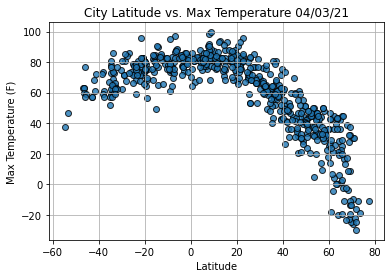

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

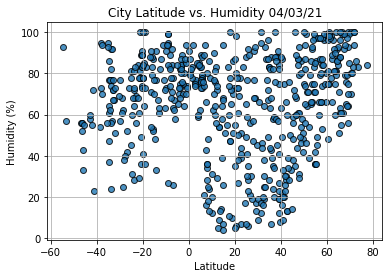

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

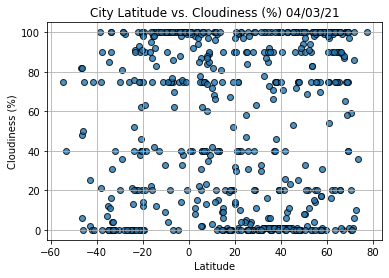

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

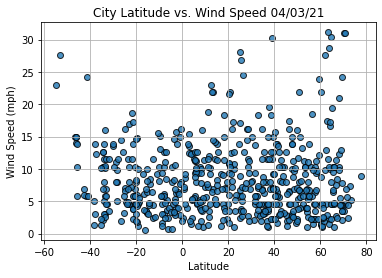

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

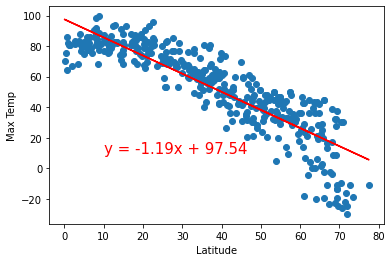

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,10))

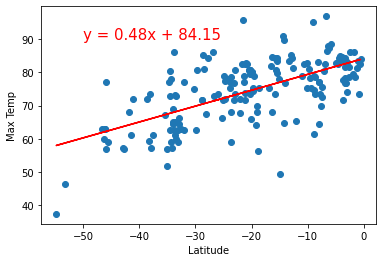

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

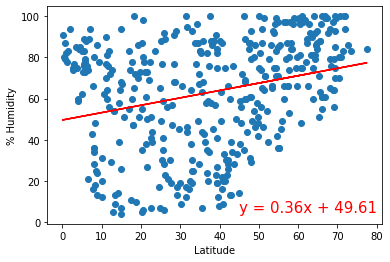

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(45,5))

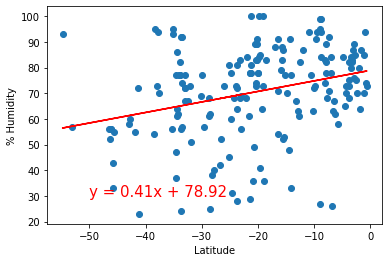

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,30))

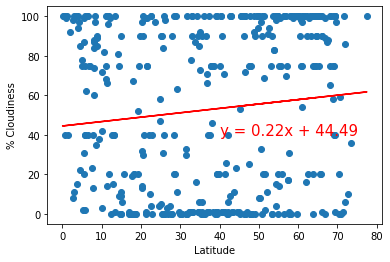

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,40))

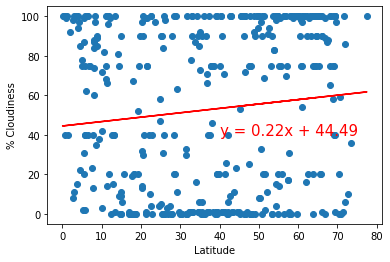

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,40))

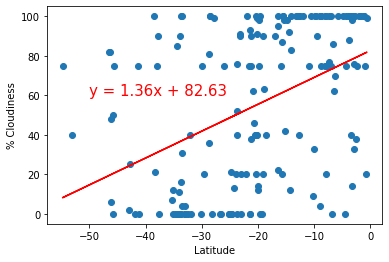

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

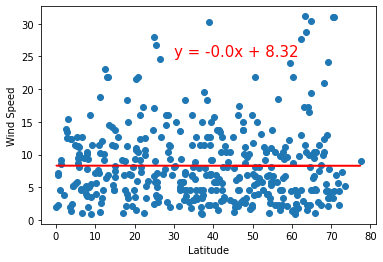

In [63]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(30,25))

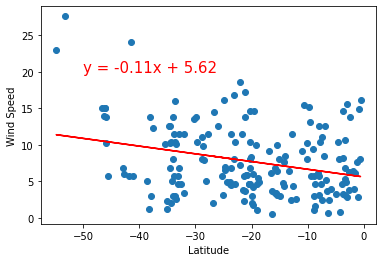

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,20))